Best ARIMA parameters: (0, 0, 0) with AIC: 2873.891927192645
                                 SARIMAX Results                                  
Dep. Variable:                        HYB   No. Observations:                  292
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood               -1348.314
Date:                    Wed, 02 Oct 2024   AIC                           2800.629
Time:                            17:07:48   BIC                           2989.638
Sample:                                 0   HQIC                          2876.441
                                    - 292                                         
Covariance Type:                      opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
VSKP                     -0.0661      1.805     -0.037      0.971      -3.605       3.472
Tempe

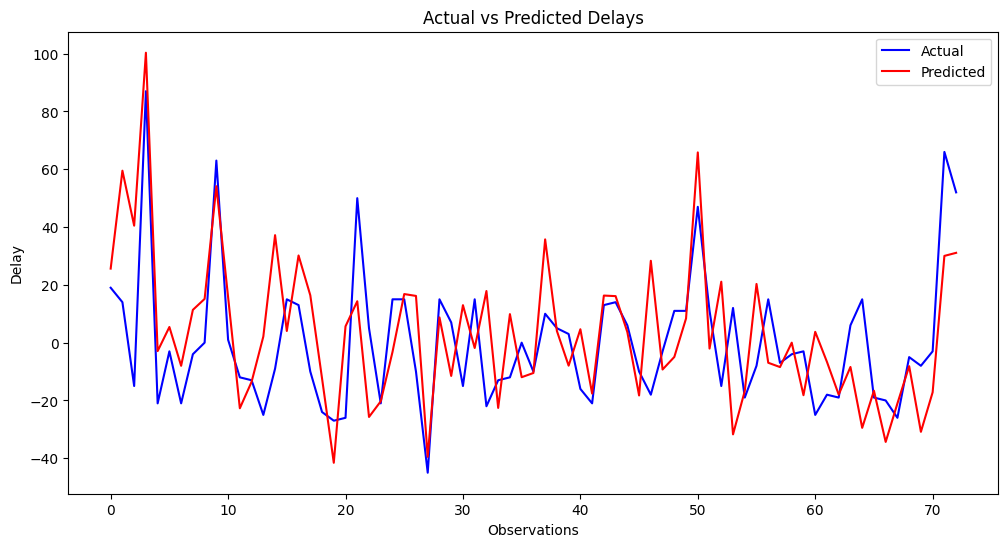

Mean Squared Error (MSE): 466.2344732894869
Root Mean Squared Error (RMSE): 21.592463344636872
R-squared (R²): 0.1357150133858389
Mean Absolute Percentage Error (MAPE): inf%


In [22]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import warnings

warnings.filterwarnings("ignore")

# Load your data
data = pd.read_csv('new_data2.csv')

data = data.drop(['date(dd/mm/yy)'], axis=1)

# Handle missing values
data.fillna(data.mean(), inplace=True)

# Define the target variable and predictors
target = 'HYB'  # Replace with your actual target variable
predictors = data.columns[data.columns != target].tolist()  

# Train-test split
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Define a function to evaluate a set of parameters
def evaluate_arima_model(train, order):
    try:
        model = SARIMAX(train[target], exog=train[predictors], order=order)
        results = model.fit(disp=False)
        return results.aic  # Return AIC for the model
    except:
        return float("inf")  # Return a large number if the model fails

# Grid search for p, d, q
p = d = q = range(0, 3)  # You can adjust the range as necessary
pdq = list(itertools.product(p, d, q))

best_aic = float("inf")
best_order = None

# Finding the best parameters
for order in pdq:
    aic = evaluate_arima_model(train, order)
    if aic < best_aic:
        best_aic = aic
        best_order = order

print(f'Best ARIMA parameters: {best_order} with AIC: {best_aic}')

# Fit the SARIMAX model with the best parameters found
p, d, q = best_order
P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters; adjust as needed
model = SARIMAX(train[target], exog=train[predictors], order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Print summary of the model
print(results.summary())

# Make predictions
predictions = results.forecast(steps=len(test), exog=test[predictors])

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(test[target].values, label='Actual', color='blue')
plt.plot(predictions.values, label='Predicted', color='red')
plt.title('Actual vs Predicted Delays')
plt.xlabel('Observations')
plt.ylabel('Delay')
plt.legend()
plt.show()

# Calculate evaluation metrics
mse = mean_squared_error(test[target].values, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test[target].values, predictions)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test[target].values - predictions) / test[target].values)) * 100


print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')


Best ARIMA parameters: (0, 0, 0) with Seasonal parameters: (1, 1, 1, 12) and AIC: 2800.6289838481202
                                 SARIMAX Results                                  
Dep. Variable:                        HYB   No. Observations:                  292
Model:             SARIMAX(1, 1, [1], 12)   Log Likelihood               -1348.314
Date:                    Wed, 02 Oct 2024   AIC                           2800.629
Time:                            17:35:35   BIC                           2989.638
Sample:                                 0   HQIC                          2876.441
                                    - 292                                         
Covariance Type:                      opg                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
VSKP                     -0.0661      1.805     -0.037 

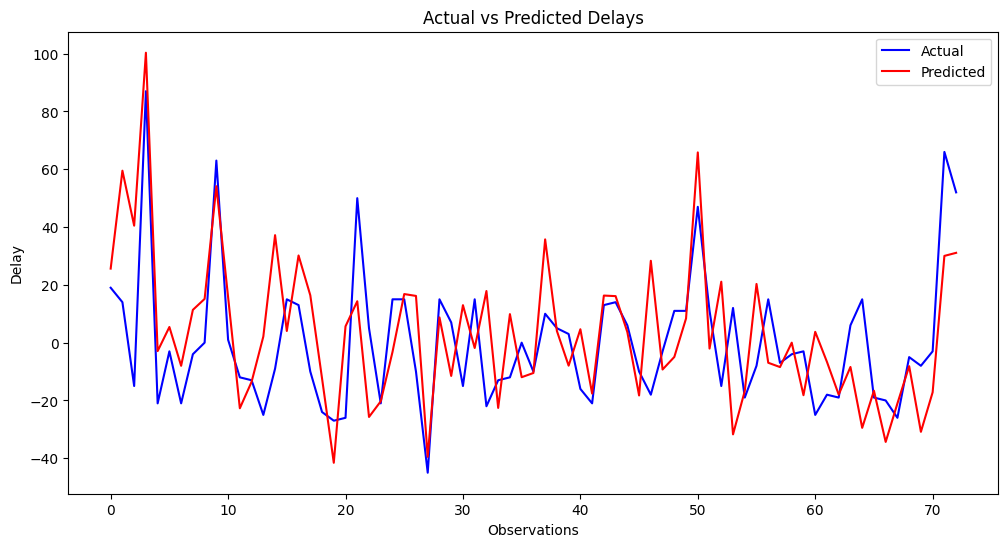

Mean Squared Error (MSE): 466.2344732894869
Root Mean Squared Error (RMSE): 21.592463344636872
R-squared (R²): 0.1357150133858389
Mean Absolute Percentage Error (MAPE): inf%


In [25]:
# Define seasonal period
s = 12  # Seasonal period (e.g., 12 for monthly data)


p = d = q = range(0, 3)  
P = D = Q = range(0, 2)  

# Create combinations of parameters for ARIMA and seasonal ARIMA
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(P, D, Q, s) for (P, D, Q) in itertools.product(P, D, Q)]

best_aic = float("inf")
best_order = None
best_seasonal_order = None

# Finding the best parameters
for order in pdq:
    for seasonal_order in seasonal_pdq:
        aic = evaluate_arima_model(train, order, seasonal_order)
        if aic < best_aic:
            best_aic = aic
            best_order = order
            best_seasonal_order = seasonal_order

if best_order is not None and best_seasonal_order is not None:
    print(f'Best ARIMA parameters: {best_order} with Seasonal parameters: {best_seasonal_order} and AIC: {best_aic}')
    
    # Fit the SARIMAX model with the best parameters found
    p, d, q = best_order
    P, D, Q = best_seasonal_order[:-1]  # Exclude the seasonal period from unpacking
    model = SARIMAX(train[target], exog=train[predictors], order=(p, d, q), seasonal_order=(P, D, Q, s))
    results = model.fit()

    # Print summary of the model
    print(results.summary())

    # Make predictions
    predictions = results.forecast(steps=len(test), exog=test[predictors])

    # Plot actual vs predicted
    plt.figure(figsize=(12, 6))
    plt.plot(test[target].values, label='Actual', color='blue')
    plt.plot(predictions.values, label='Predicted', color='red')
    plt.title('Actual vs Predicted Delays')
    plt.xlabel('Observations')
    plt.ylabel('Delay')
    plt.legend()
    plt.show()

    # Calculate evaluation metrics
    mse = mean_squared_error(test[target].values, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(test[target].values, predictions)

    # Calculate Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((test[target].values - predictions) / test[target].values)) * 100

    
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')
    print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
else:
    print("No valid ARIMA parameters found.")
